In [1]:
#Set a randomisation seed for replicatavility 
import os
os.environ['PYTHONHASHSEED'] = '0'
seed = 6
import random as rn
rn.seed(seed)
import numpy as np
np.random.seed(seed)

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K
import keras
tf.set_random_seed(seed)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

print('keras using %s backend'%keras.backend.backend())
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Sets up the graphing configuration
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Using TensorFlow backend.


keras using tensorflow backend


In [2]:
#Loads the data 
dataset = pd.read_csv('dog_data.csv')
print(dataset.head(10))

#separate out the features
features = dataset.drop(['breed'], axis = 1)

#sets the target one-hot vectors
target = OneHotEncoder(sparse = False).fit_transform(np.transpose([dataset['breed']]))

#take the first 1/5 of the data and assign it to testing 
train_X = features.values[:160]
train_Y = target[:160]

#take the last 1/5 of the data and assign it to testing 
test_X = features.values[160:]
test_Y = target[160:]



     age  weight  height  breed
0   9.47    6.20    6.80      1
1   7.97    8.63    8.92      0
2   9.51    6.40    5.78      1
3   8.96    8.82    6.28      2
4   8.37    3.89    5.62      1
5   9.46    9.56    5.77      2
6  10.40   11.00    7.78      0
7   9.08    7.10    5.79      1
8   9.53    9.29    5.03      2
9   8.57    5.09    4.05      1


In [3]:
def train_network(structure, activation, optimizer, epochs):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed)
    np.random.seed(seed)
    tf.set_random_seed(seed)
    K.set_session(sess)
    
    #This initialises the model
    model = keras.models.Sequential()
    
    #This is the input + the first hidden layer 1 
    model.add(keras.layers.Dense(units = structure[1], input_dim = structure[0],activation = activation))
    
    #Hidden layer 2, if not ignored 
    if structure[2] > 0:
        model.add(keras.layers.Dense(units=structure[2], activation = activation))
    
    #output layer
    model.add(keras.layers.Dense(units=structure[-1], activation = tf.nn.softmax))
    
    #compiles the model with parameter 
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    #This tells that the training has started. 
    print('training...', end = '')
    
    #This trains the network 
    training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = epochs, verbose = 0, shuffle = False)
    
    #Results ! 
    print('train_acc: %0.3f, test_acc: %0.3f' %(training_stats.history['acc'][-1],model.evaluate(test_X, test_Y, verbose = 0)[1]))
    
    #This returns the results and the model for use outside the function
    return training_stats, model 

#plot the evaluations in a line graph to see how they compare 
def plot_acc(train_acc, test_acc, title):
    #plots the training and testing accuracy lines 
    training_accuracy, = graph.plot(train_acc, label = 'Training Accuracy')
    testing_accuracy, = graph.plot(test_acc, label = 'Testing Accuracy')
    graph.legend(handles = [training_accuracy, testing_accuracy])
    
    #plots guide lines along y = 0 and y = 1 to help visualise 
    xp = np.linspace(0, train_acc.shape[0] -1, 10 * train_acc.shape[0])
    graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
    graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
    
    graph.xticks(range(0, train_acc.shape[0]), range(1, train_acc.shape[0]+1))
    graph.ylim(0,1)
    graph.title(title)
    
    graph.show()
    
#plots the evaluation in a bar chart to see how they compare 
def bar_acc(train_acc, test_acc, title, xticks):
    index = range(1, train_acc.shape[0]+1)
    
    #plots the training and testing accuracy bars 
    training_accuracy = graph.bar(index, train_acc, 0.4, align = 'center')
    testing_accuracy = graph.bar(index, test_acc, 0.4, align = 'edge')
    graph.legend((training_accuracy[0], testing_accuracy[0]), ('Trianing Accuracy', 'Testing Accuracy'))

    graph.xticks(index, xticks)
    graph.title(title)
    
    graph.show()
    
 

Evaluating model with 1 hidden neurons... training...train_acc: 0.344, test_acc: 0.250


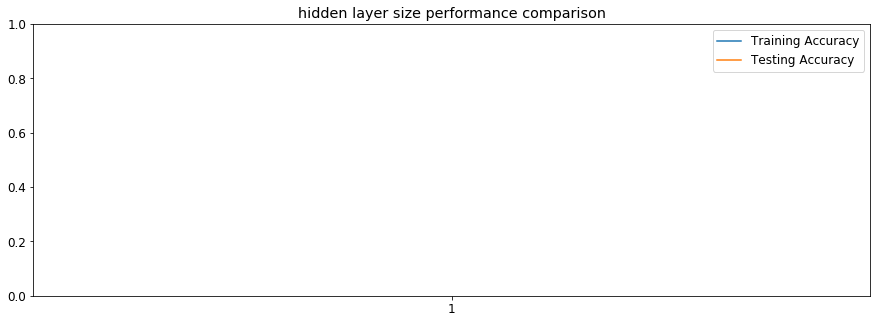

Evaluating model with 2 hidden neurons... training...train_acc: 0.556, test_acc: 0.575


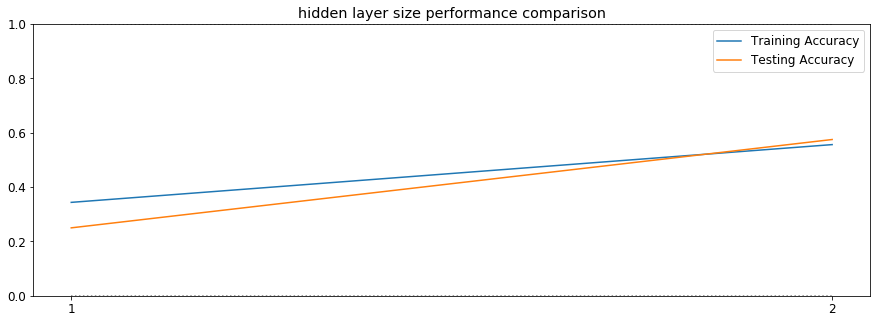

Evaluating model with 3 hidden neurons... training...train_acc: 0.681, test_acc: 0.525


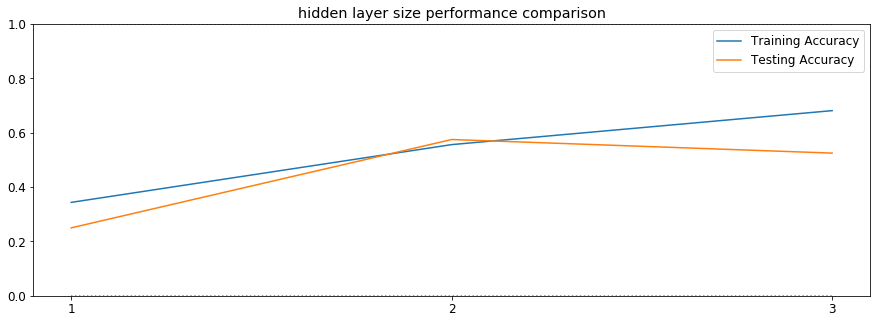

Evaluating model with 4 hidden neurons... training...train_acc: 0.581, test_acc: 0.475


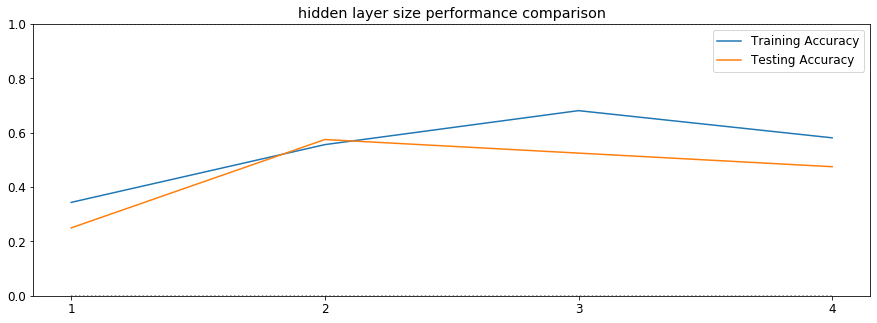

Evaluating model with 5 hidden neurons... training...train_acc: 0.887, test_acc: 0.750


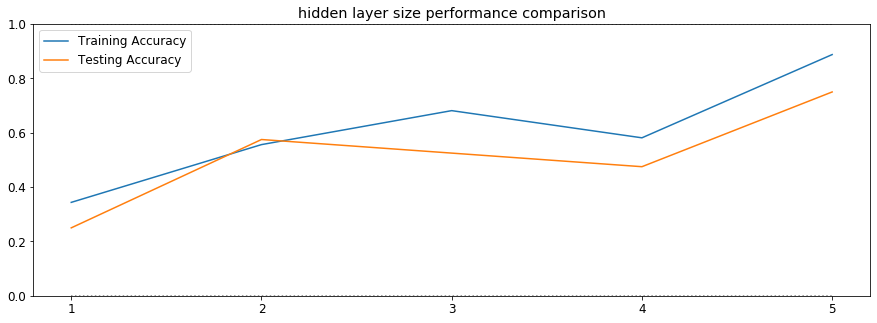

Evaluating model with 6 hidden neurons... training...train_acc: 0.944, test_acc: 0.975


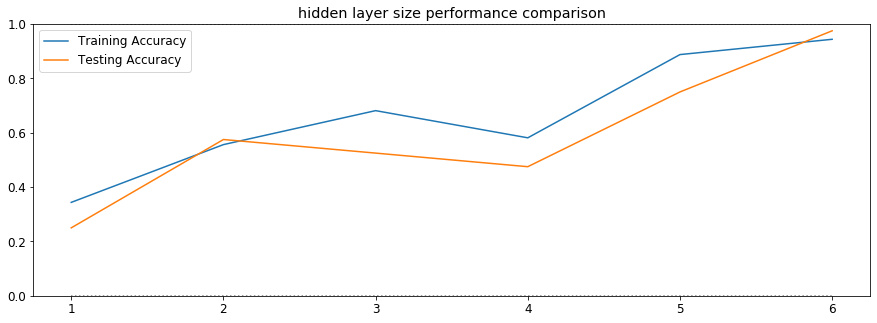

Evaluating model with 7 hidden neurons... training...train_acc: 0.637, test_acc: 0.575


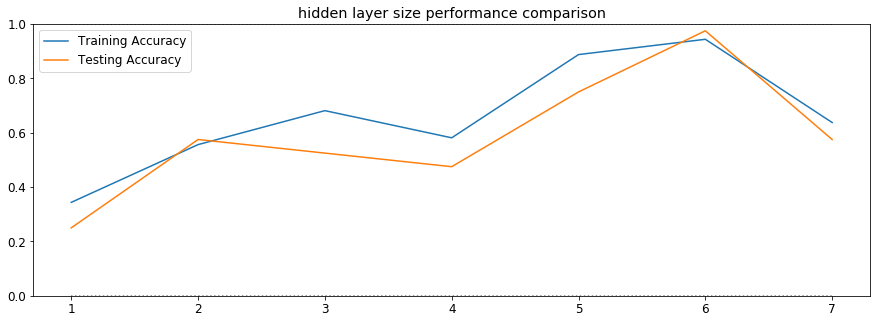

Evaluating model with 8 hidden neurons... training...train_acc: 0.963, test_acc: 0.950


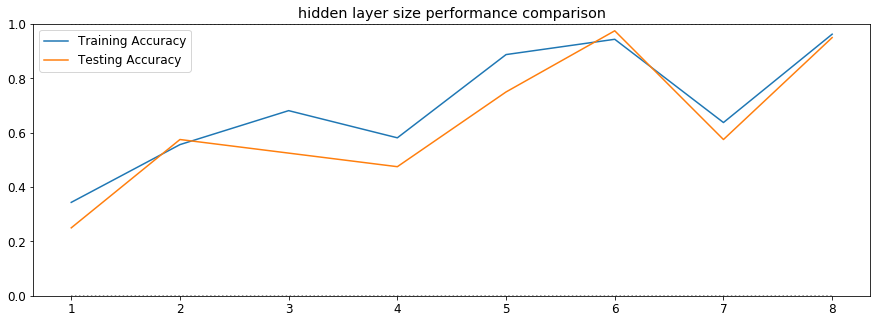

Evaluating model with 9 hidden neurons... training...train_acc: 0.963, test_acc: 0.850


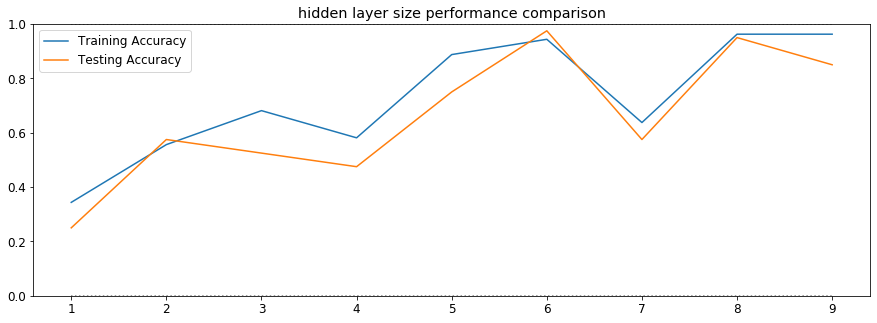

Evaluating model with 10 hidden neurons... training...train_acc: 0.969, test_acc: 0.950


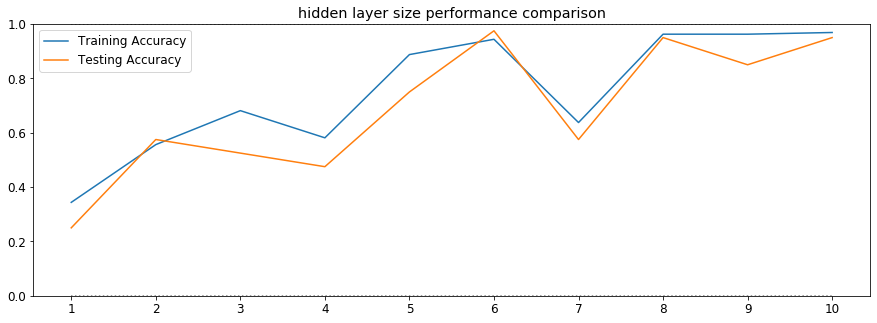

In [4]:
#how different layer sizes impact performance. look at a network with just one hidden layer and see how it performs with 1 to 10 nodes 
#initialises empty arrays into which to append new values 

train_acc = np.empty((0))
test_acc = np.empty((0))

for hidden1 in range (1, 11):
    print('Evaluating model with %i hidden neurons... ' %hidden1, end = '')
    
    training_stats, model = train_network(structure = [3, hidden1, hidden1, 3],activation = 'relu', optimizer = 'RMSprop', epochs = 12)
    train_acc = np.append(train_acc, training_stats.history['acc'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose = 0)[1])
    
    plot_acc(train_acc, test_acc, 'hidden layer size performance comparison')
    
                                          

Evaluating model with elu hidden layer activation functions...training...train_acc: 0.938, test_acc: 0.900


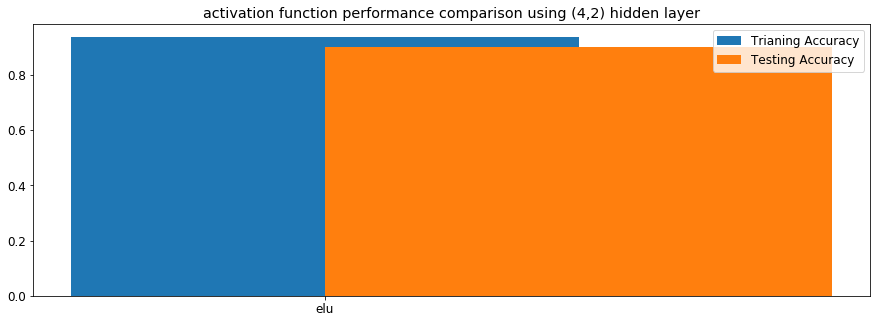

Evaluating model with selu hidden layer activation functions...training...train_acc: 0.944, test_acc: 0.900


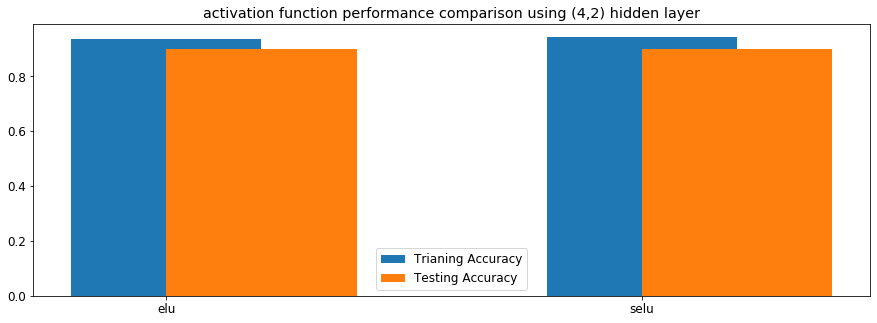

Evaluating model with relu hidden layer activation functions...training...train_acc: 0.631, test_acc: 0.575


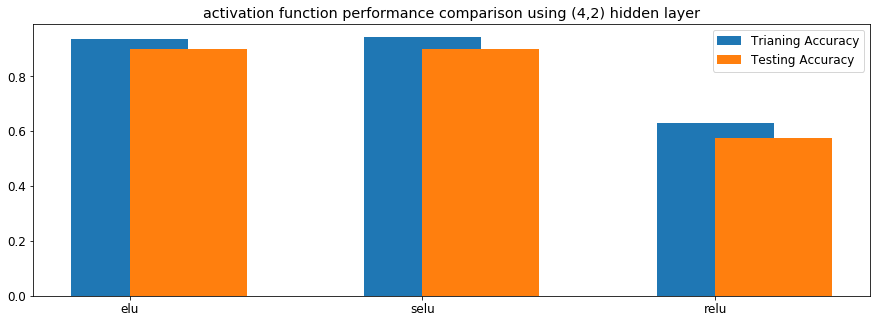

Evaluating model with tanh hidden layer activation functions...training...train_acc: 0.675, test_acc: 0.600


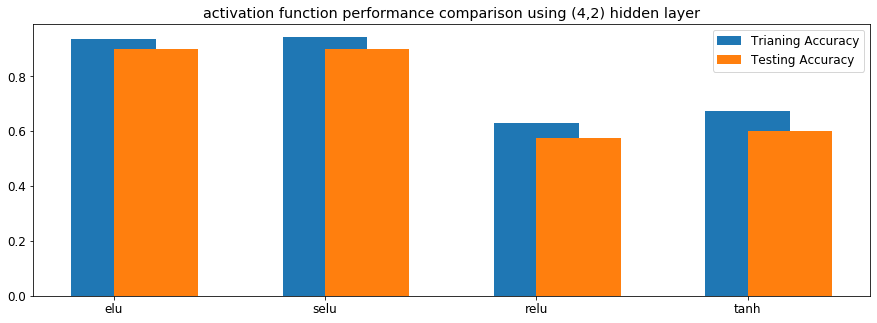

Evaluating model with sigmoid hidden layer activation functions...training...train_acc: 0.344, test_acc: 0.250


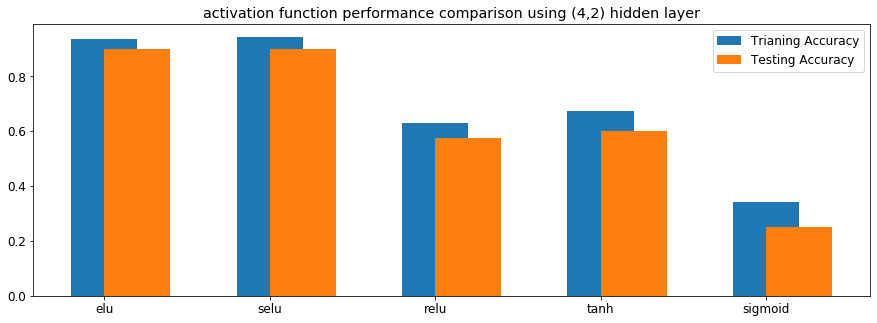

Evaluating model with hard_sigmoid hidden layer activation functions...training...train_acc: 0.319, test_acc: 0.225


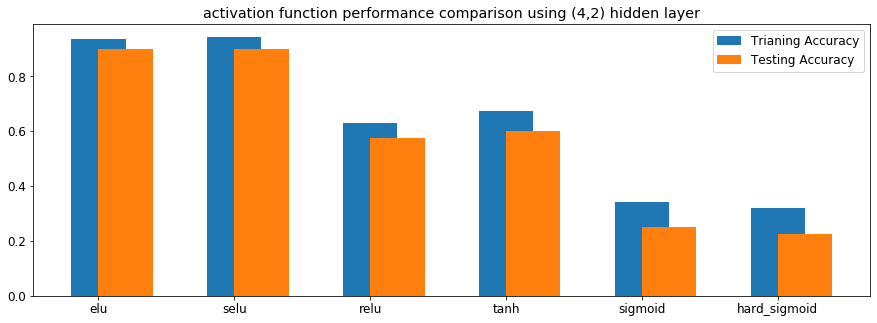

Evaluating model with softplus hidden layer activation functions...training...train_acc: 0.575, test_acc: 0.550


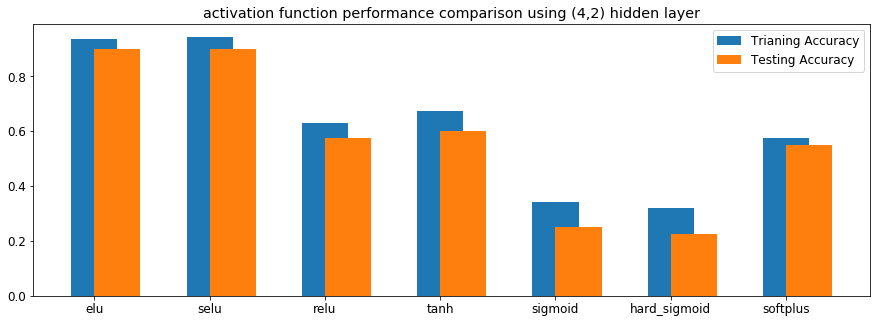

Evaluating model with softsign hidden layer activation functions...training...train_acc: 0.944, test_acc: 0.900


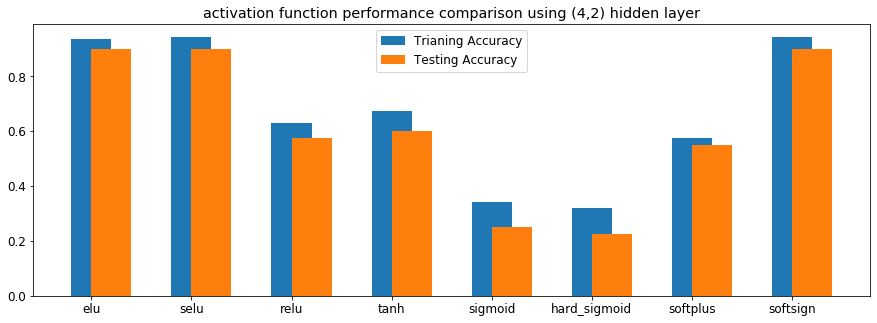

Evaluating model with linear hidden layer activation functions...training...train_acc: 0.637, test_acc: 0.725


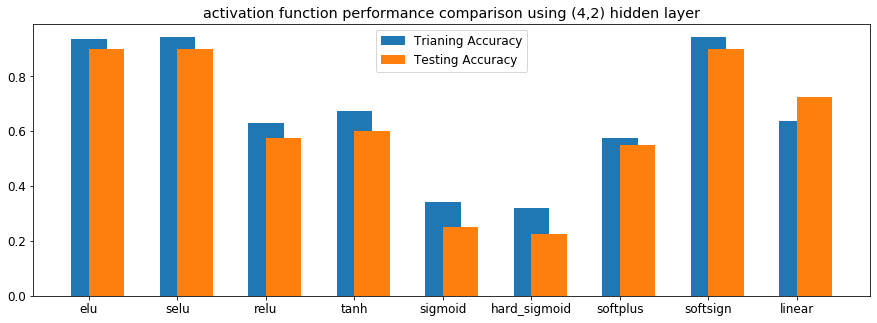

In [5]:
#look at how different activation functions impact the peformance. Trying both relu and tanh first
train_acc = np.empty((0))
test_acc = np.empty((0))

#make a list of the activation functions we wish to compare 
activation_functions = ['elu', 'selu', 'relu', 'tanh','sigmoid', 'hard_sigmoid', 'softplus','softsign','linear']
for activation in activation_functions:
    print('Evaluating model with %s hidden layer activation functions...' %activation, end = '')
    
    training_stats, model = train_network(structure = [3,4,2,3], activation = activation, optimizer = 'RMSprop', epochs = 12)
    
    train_acc = np.append(train_acc, training_stats.history['acc'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose = 0)[1])
    
    bar_acc(train_acc, test_acc, 'activation function performance comparison using (4,2) hidden layer', activation_functions)
    

Evaluating model with SGD optimizer...training...train_acc: 0.756, test_acc: 0.900


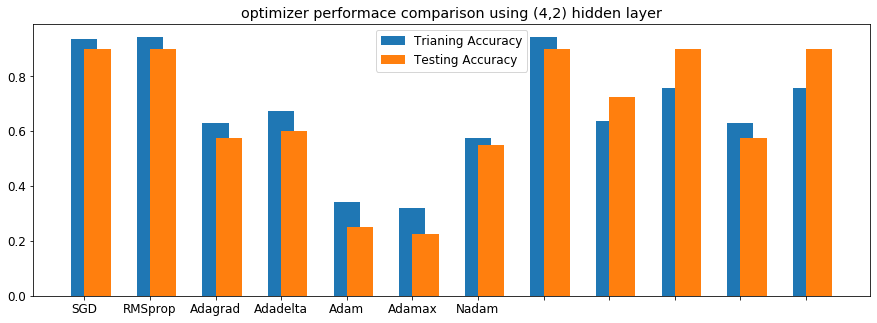

Evaluating model with RMSprop optimizer...training...train_acc: 0.631, test_acc: 0.575


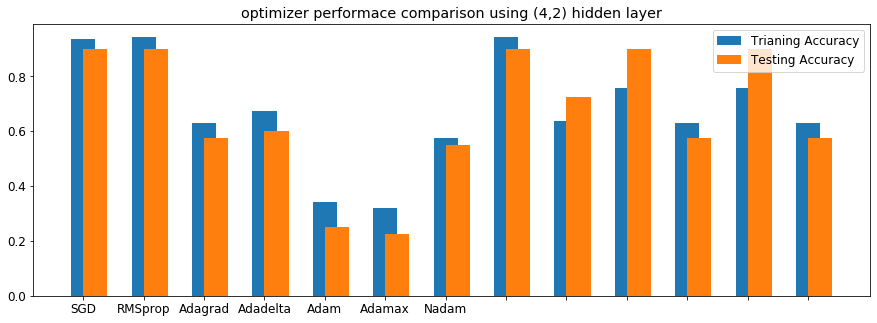

Evaluating model with Adagrad optimizer...training...train_acc: 0.469, test_acc: 0.600


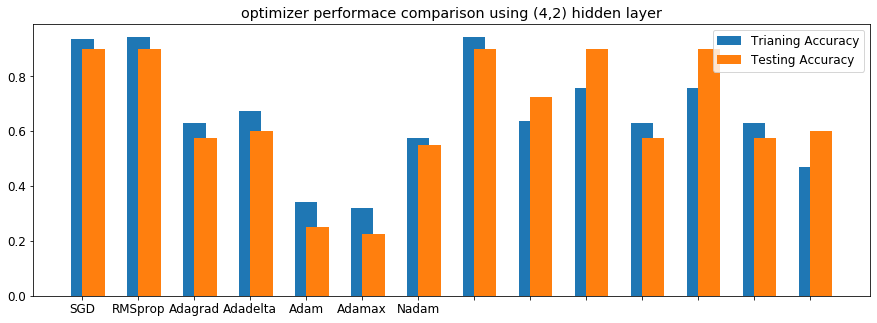

Evaluating model with Adadelta optimizer...training...train_acc: 0.637, test_acc: 0.575


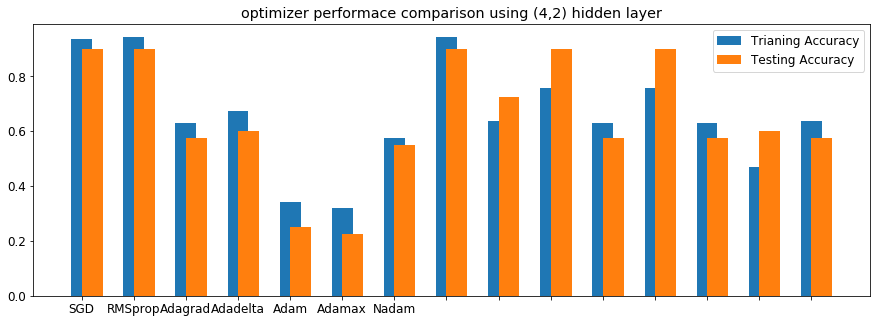

Evaluating model with Adam optimizer...training...train_acc: 0.631, test_acc: 0.575


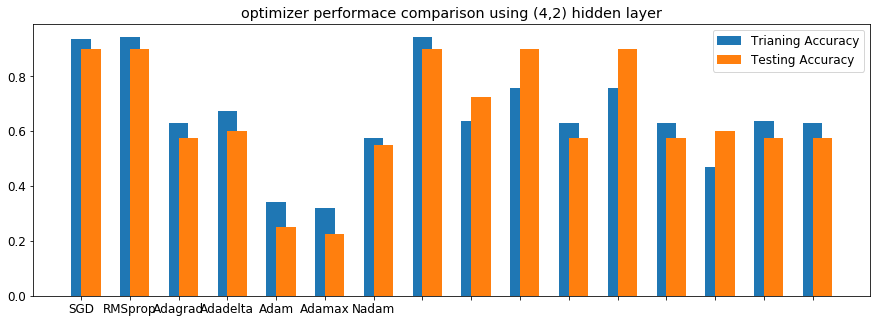

Evaluating model with Adamax optimizer...training...train_acc: 0.625, test_acc: 0.575


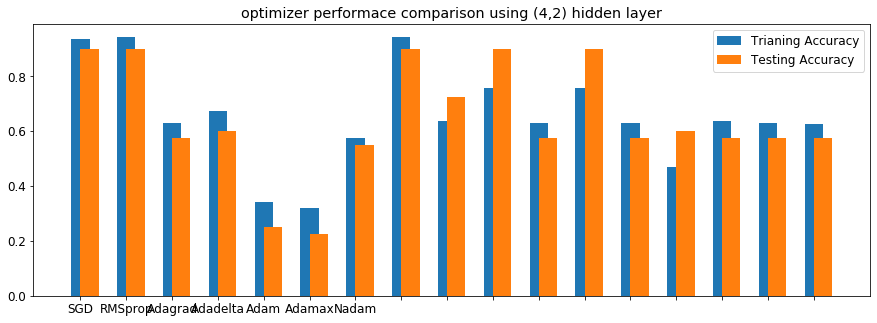

Evaluating model with Nadam optimizer...training...train_acc: 0.637, test_acc: 0.575


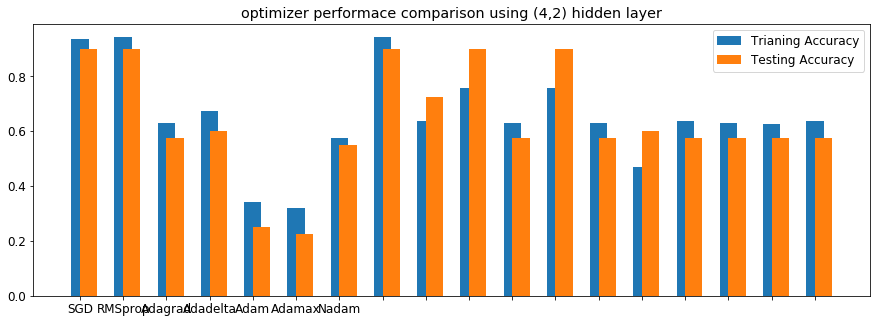

In [7]:
#optimisation fucntion is the last major parameter of the network architecture. It changes how the network is trained so it can have a large impact on training time and end performance 
#list of the optimisation functions to compare 
optimization_functions = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam','Adamax','Nadam']
for optimizer in optimization_functions:
    print('Evaluating model with %s optimizer...' %optimizer, end = '')
    
    #specify the optimizer in the code
    training_stats, model = train_network(structure = [3,4,2,3], activation = 'relu', optimizer = optimizer, epochs = 12)
    
    #recording the data for the plot 
    train_acc = np.append(train_acc, training_stats.history['acc'][-1])
    test_acc = np.append(test_acc, model.evaluate(test_X, test_Y, verbose = 0)[1])
    
    #now, the plot !
    bar_acc(train_acc, test_acc, 'optimizer performace comparison using (4,2) hidden layer', optimization_functions)
    

training...train_acc: 0.975, test_acc: 0.950


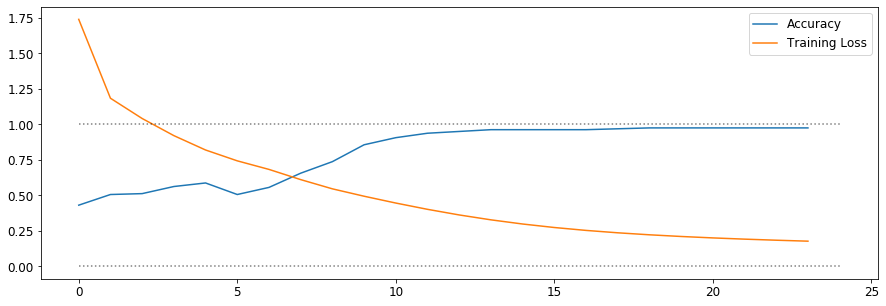

In [18]:
#neural network layer structure
structure = [3, 4, 2, 3]

#choosing an activation function
activation = 'elu'

#choosing a optimizer
optimizer = 'RMSprop'

training_stats, model = train_network(structure, activation, optimizer, epochs = 24)

#plot the training statistics to see how it developed over time 
accuracy, = graph.plot(training_stats.history['acc'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()